In [15]:
import sympy
from sympy.tensor.array import derive_by_array as grad
import numpy as np

# 1. Let us consider the following two-variable function:

In [3]:
X, Y = sympy.symbols('x, y') 

In [4]:
fxy = Y * sympy.cos(X) - X * sympy.tan(2*Y)

In [5]:
fxy

-x*tan(2*y) + y*cos(x)

## a., Calculate the gradient of the function with sympy

In [9]:
grad(fxy, (X, Y))

[-y*sin(x) - tan(2*y), -x*(2*tan(2*y)**2 + 2) + cos(x)]

## b., Calculate the Hesse Matrix of the function

In [10]:
grad(grad(fxy, (X,Y)), (X,Y))

[[-y*cos(x), -sin(x) - 2*tan(2*y)**2 - 2], [-sin(x) - 2*tan(2*y)**2 - 2, -2*x*(4*tan(2*y)**2 + 4)*tan(2*y)]]

# 2. Let us consider the following differentiation scheme

## a., Implement the scheme with f`(x0) and h = 0.01

In [12]:
def new_method(f, x0, h):
    forward = f(x0 + h)
    forward2 = f(forward + h)
    backward = f(x0 - h)
    backward2 = f(backward - h)
    return ( backward2 - forward2 ) / 12*h

## b., Use the above scheme to calculate the derivative of the function

In [13]:
def fx(x_):
    return x_ * sympy.sin(2*x_)

In [32]:
h_steps = [10**(-xp) for xp in range(1, 157)]

In [37]:
results = [new_method(fx, x0, 0.01) for x0 in h_steps]

In [41]:
def f_diff(x_):
    return sympy.cos(2*x_)

In [42]:
anal_result = f_diff(np.pi/2)

In [43]:
errors = [np.abs(result - anal_result) for result in results]

## c., plot

In [45]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (19,) and (1,)

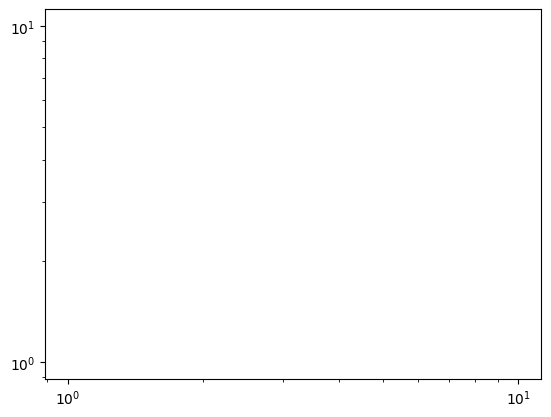

In [49]:
plt.loglog(h_steps, anal_result, 'x-', label='analytic derivative')

# 3. Let us consider the following initial value problem

In [51]:
from scipy.optimize import fsolve

## a.,

In [56]:
def IEE(func, t0, y0, time_step):
    y_prime = (-1*func(y0, t0)) - sympy.sin(t0)
    y_next = y0 + (time_step * y_prime)
    print(f'{t0:6.4f} {y0:6.4f} {y_prime:6.4f} {y_next:6.4f}')
    return y_next

## b.,

In [57]:
def f(x_, xx_):
    return (-xx_) - sympy.sin(x_)

In [60]:
def loop_IEE(func, method, t0, y0, time_step, iterations):
    print("    t0     y0      y`     y1")
    y_values = np.zeros(iterations + 1)
    y_values[0] = y0
    time_points = np.zeros(iterations + 1)
    time_points[0] = t0
    for step in range(iterations):
        y_next = method(func, time_points[step], y_values[step], time_step)
        time_points[step + 1] = time_points[step] + time_step
        y_values[step + 1] = y_next
        print(f'{time_points[step+1]:6.4} {y_values[step+1]:6.4}')
    return time_points, y_values

In [62]:
timetps, yvs = loop_IEE(f, IEE, 0, 0.3, 0.01, 10)

    t0     y0      y`     y1
0.0000 0.3000 0.2955 0.3030
  0.01  0.303
0.0100 0.3030 0.2983 0.3059
  0.02 0.3059
0.0200 0.3059 0.3012 0.3090
  0.03  0.309
0.0300 0.3090 0.3041 0.3120
  0.04  0.312
0.0400 0.3120 0.3070 0.3151
  0.05 0.3151
0.0500 0.3151 0.3099 0.3182
  0.06 0.3182
0.0600 0.3182 0.3129 0.3213
  0.07 0.3213
0.0700 0.3213 0.3158 0.3244
  0.08 0.3244
0.0800 0.3244 0.3189 0.3276
  0.09 0.3276
0.0900 0.3276 0.3219 0.3309
   0.1 0.3309


## c.,

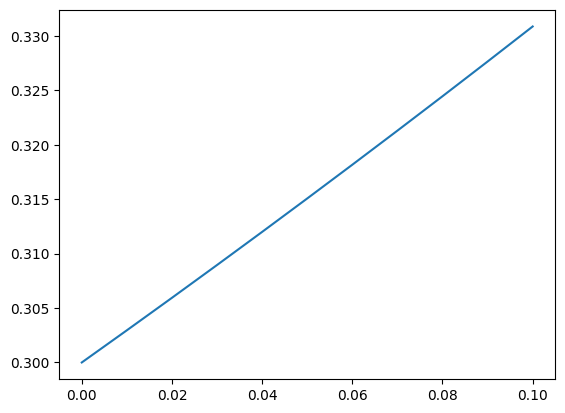

In [64]:
plt.plot(timetps, yvs, label='improved EE')